In [1]:
technique = 'dlpfc'
data_path = f"../data/{technique}"
root_save_path = f"../saved_results/{technique}"
device = "cuda:0"

In [3]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd


import sys
sys.path.append('..')
from src.interface import UnitedNet
from src.configs import *
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score


In [6]:
def split_data(test_batch):
    adata_rna_train = adata_rna_all[adata_rna_all.obs['batch'] != test_batch]
    adata_morph_train = adata_morph_all[adata_morph_all.obs['batch'] != test_batch]
    adata_mrna_niche_train = adata_mrna_niche_all[adata_mrna_niche_all.obs['batch'] != test_batch]

    adata_rna_test = adata_rna_all[adata_rna_all.obs['batch'] == test_batch]
    adata_morph_test = adata_morph_all[adata_morph_all.obs['batch'] == test_batch]
    adata_mrna_niche_test = adata_mrna_niche_all[adata_mrna_niche_all.obs['batch'] == test_batch]

    return [adata_rna_train, adata_morph_train, adata_mrna_niche_train], [adata_rna_test, adata_morph_test,
                                                                          adata_mrna_niche_test]


def concat_adatas(adatas_train, adatas_test):
    return [ad.concat([adata_train, adata_test]) for adata_train, adata_test in zip(adatas_train, adatas_test)]


# load input DLPFC data

In [4]:
adata_rna_all = sc.read_h5ad(f'../data/{technique}/adata_rna_all.h5ad')
adata_morph_all = sc.read_h5ad(f'../data/{technique}/adata_morph_all.h5ad')
adata_mrna_niche_all = sc.read_h5ad(f'../data/{technique}/adata_mrna_niche_all.h5ad')

/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
test_batches=['151509','151507', '151508',  '151510' ,
    '151669', '151670', '151671', '151672' ,
    '151673', '151674', '151675', '151676' ]
for test_batch in test_batches:
    print(test_batch)
    adatas_train, adatas_test = split_data(test_batch)
    save_path = f"{root_save_path}/{test_batch}"

    model = UnitedNet(save_path, device=device, technique=dlpfc_config)
    model.train(adatas_train)
    model.transfer(adatas_train, adatas_test)

151509
151507
151508
151510
151669
151670
151671
151672
151673
151674
151675
151676


# Plot figures

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


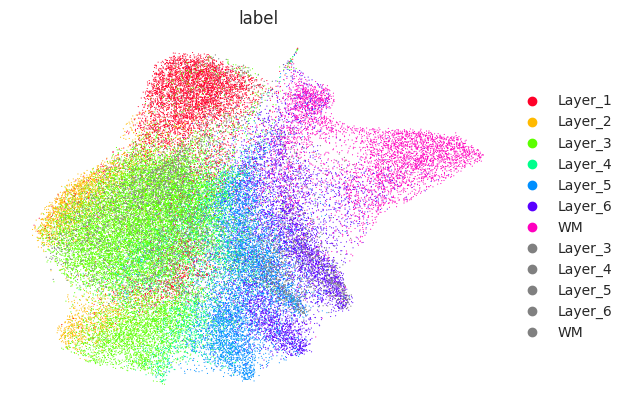

/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


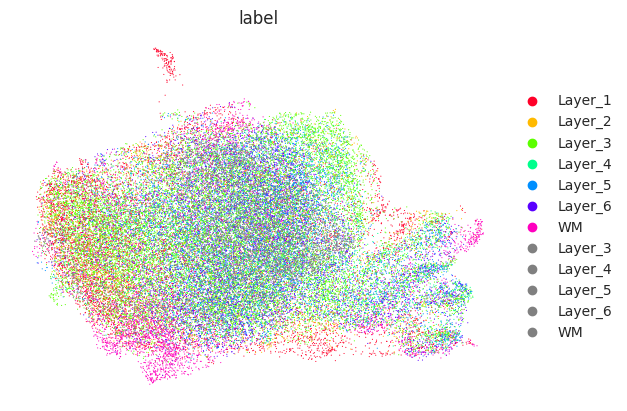

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/kurisute/miniconda3/envs/unitednet/lib/python3.7/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


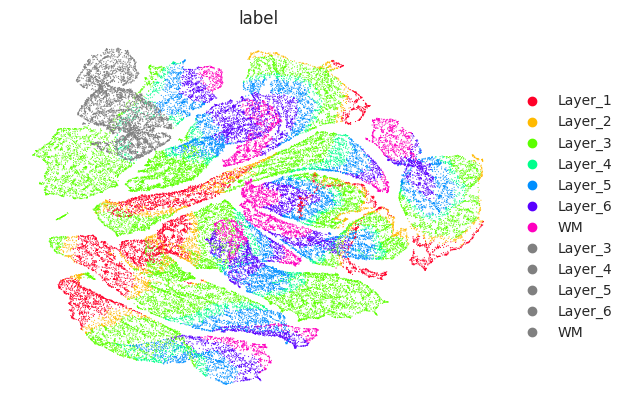

In [6]:
import matplotlib.pyplot as plt


test_batch='151670'
adatas_train, adatas_test = split_data(test_batch)
adatas_all = concat_adatas(adatas_train, adatas_test)

save_path = f"{root_save_path}/{test_batch}"


cmap_wt = plt.get_cmap('ocean')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
size_umap = 120000 / adatas_all[0].shape[0]


for mod_id in range(3):
    fig,ax=plt.subplots()
    sc.pp.neighbors(adatas_all[mod_id])
    sc.tl.umap(adatas_all[mod_id])
    ax = sc.pl.umap(adatas_all[mod_id][adatas_all[mod_id].obs['batch']!=test_batch],color=['label'],
                    size=size_umap,frameon = False,palette='gist_rainbow',ax=ax,show=False)
    

    sc.pl.umap(adatas_all[mod_id][adatas_all[mod_id].obs['batch']==test_batch], color=['label'],
               size=size_umap*1.2,frameon = True,palette=['grey'],ax=ax,
               )

Load model and plot fused codes

In [ ]:
import matplotlib.pyplot as plt
import torch

test_batch='151670'
adatas_train, adatas_test = split_data(test_batch)
adatas_all = concat_adatas(adatas_train, adatas_test)

save_path = f"{root_save_path}/{test_batch}"

model = UnitedNet(save_path, device=device, technique=dlpfc_config)
model.load_model(f"{root_save_path}/{test_batch}/transfer_epoch_2.pt",device=torch.device(device))
model.model.device_in_use = device
adatas = concat_adatas(adatas_train, adatas_test)
adata_all = model.infer(adatas)
adata_all.obs['batch'] = list(adatas[0].obs['batch'])
adata_all.obs['label'] = list(adatas[0].obs['label'])

In [ ]:

import matplotlib.pyplot as plt
cmap_wt = plt.get_cmap('ocean')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
size_umap = 120000 / adatas[0].shape[0]

fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'dlpfc_batch_label.pdf')

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_gt_label.pdf')

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'dlpfc_predict_label.pdf')
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'dlpfc_predict_label_test.pdf')

In [ ]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
from matplotlib.colors import to_hex
type_cl_dict = {}
batch_name = test_batch
for x,y in zip(adata_all[adata_all.obs['batch']!=batch_name].obs['label'].astype('category').cat.categories,
               plt.get_cmap('gist_rainbow')(np.linspace(0, 1, len(adata_all.obs['label'].unique()))).tolist()):
    type_cl_dict[x] = to_hex(y)


new_cmap = adata_all[adata_all.obs['batch']!=batch_name].obs['label'].map(type_cl_dict).values
new_cmap_bct = adata_all[adata_all.obs['batch']==batch_name].obs['predicted_label'].map(type_cl_dict).values

size_umap = 120000 / adatas[0].shape[0]
                                                                                    
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection="3d")
np.random.seed(0)
ax.scatter3D(1, adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1], color=new_cmap,s=size_umap, zorder=1)
ax.scatter3D(2, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color='gray',s=size_umap, zorder=2)
ax.scatter3D(3, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color=new_cmap_bct,s=size_umap, zorder=3)
all_dots_x = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0]
all_dots_y = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1]
u_l = [all_dots_x.min()-1,all_dots_y.max()+1]
u_r = [all_dots_x.max()+1,all_dots_y.max()+1]
l_l = [all_dots_x.min()-1,all_dots_y.min()-1]
l_r = [all_dots_x.max()+1,all_dots_y.min()-1]

ax.plot3D([1,1,1,1,1],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=1)
ax.plot3D([2,2,2,2,2],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=2)
ax.plot3D([3,3,3,3,3],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=3)

ax.view_init(5, -70)

# Hide grid lines
ax.grid(False)
plt.axis('off')
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


for y,z in zip([l_r[0],l_l[0],u_l[0],u_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1]]):
  a = Arrow3D([1, 3], [y, y], 
              [z, z], mutation_scale=20, ls="dashed",
              lw=1, arrowstyle="-|>", color="grey")
  ax.add_artist(a)

plt.savefig('./figures/DLPFC_transfer_cell_type.png',dpi=800)
plt.show()